In [14]:
import os
train_dir = '/content/drive/My Drive/Face Mask detection /train'
test_dir ='/content/drive/My Drive/Face Mask detection /test'
train_with_dir = os.path.join(train_dir, 'with_mask')
train_without_dir = os.path.join(train_dir, 'without_mask')
test_with_dir = os.path.join(test_dir, 'with_mask')
test_without_dir = os.path.join(test_dir, 'without_mask')

In [15]:
train_with_fnames = os.listdir(train_with_dir)
print(train_with_fnames[:10])
train_without_fnames = os.listdir(train_without_dir)
train_without_fnames.sort()
print(train_without_fnames[:10])

['image_0.png', 'image_108.png', 'image_112.png', 'image_103.png', 'image_107.png', 'image_109.png', 'image_102.png', 'image_100.png', 'image_106.png', 'image_11.png']
['image_0.png', 'image_1.png', 'image_10.png', 'image_100.png', 'image_101.png', 'image_102.png', 'image_103.png', 'image_104.png', 'image_105.png', 'image_106.png']


In [16]:

%matplotlib inline
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
nrows = 4
ncols = 4
pic_index = 0

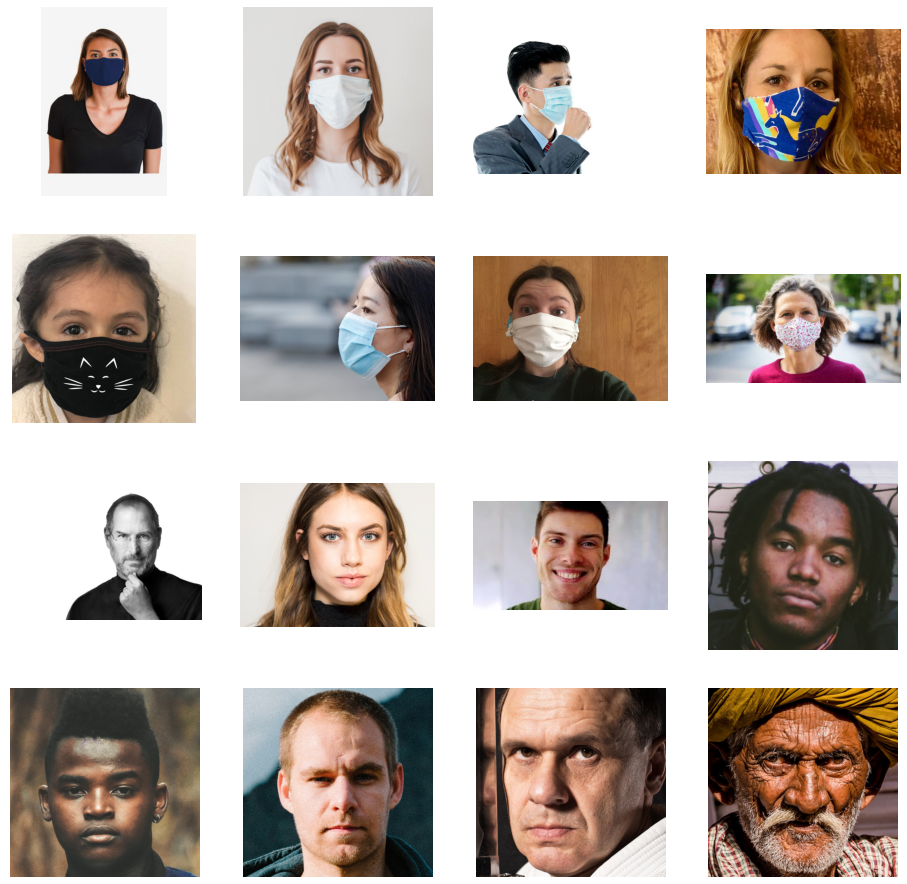

In [17]:
# Set up matplotlib fig, and size it to fit 4x4 pics
fig = plt.gcf()
fig.set_size_inches(ncols * 4, nrows * 4)

pic_index += 8
next_normal_pix = [os.path.join(train_with_dir, fname) 
                for fname in train_with_fnames[pic_index-8:pic_index]]
next_pneumonia_pix = [os.path.join(train_without_dir, fname) 
                for fname in train_without_fnames[pic_index-8:pic_index]]

for i, img_path in enumerate(next_normal_pix+next_pneumonia_pix):
  # Set up subplot; subplot indices start at 1
  sp = plt.subplot(nrows, ncols, i + 1)
  sp.axis('Off') # Don't show axes (or gridlines)
  img = mpimg.imread(img_path)
  plt.imshow(img)
plt.show()

In [18]:
from tensorflow.keras import layers
from tensorflow.keras import Model
img_input = layers.Input(shape=(150, 150, 3))
x = layers.Conv2D(16, 3, activation='relu')(img_input)
x = layers.MaxPooling2D(2)(x)
x = layers.Conv2D(32, 3, activation='relu')(x)
x = layers.MaxPooling2D(2)(x)
x = layers.Conv2D(64, 3, activation='relu')(x)
x = layers.MaxPooling2D(2)(x)
x = layers.Flatten()(x)
x = layers.Dense(512, activation='relu')(x)
output = layers.Dense(1, activation='sigmoid')(x)
model = Model(img_input, output)

In [19]:
# Flatten feature map to a 1-dim tensor so we can add fully connected layers
x = layers.Flatten()(x)

# Create a fully connected layer with ReLU activation and 512 hidden units
x = layers.Dense(512, activation='relu')(x)

# Create output layer with a single node and sigmoid activation
output = layers.Dense(1, activation='sigmoid')(x)

# Create model:
# input = input feature map
# output = input feature map + stacked convolution/maxpooling layers + fully 
# connected layer + sigmoid output layer
model = Model(img_input, output)

In [20]:
model.summary()

Model: "functional_7"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_2 (InputLayer)         [(None, 150, 150, 3)]     0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 148, 148, 16)      448       
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 74, 74, 16)        0         
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 72, 72, 32)        4640      
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 36, 36, 32)        0         
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 34, 34, 64)        18496     
_________________________________________________________________
max_pooling2d_5 (MaxPooling2 (None, 17, 17, 64)       

In [21]:
from tensorflow.keras.optimizers import RMSprop

model.compile(loss='binary_crossentropy',
              optimizer=RMSprop(lr=0.001),
              metrics=['acc'])

In [22]:


from tensorflow.keras.preprocessing.image import ImageDataGenerator

# All images will be rescaled by 1./255
train_datagen = ImageDataGenerator(rescale=1./255)
val_datagen = ImageDataGenerator(rescale=1./255)

# Flow training images in batches of 20 using train_datagen generator
train_generator = train_datagen.flow_from_directory(
        train_dir,  # This is the source directory for training images
        target_size=(150, 150),  # All images will be resized to 150x150
        batch_size=20,
        # Since we use binary_crossentropy loss, we need binary labels
        class_mode='binary')

# Flow validation images in batches of 20 using val_datagen generator
test_generator = val_datagen.flow_from_directory(
        test_dir,
        target_size=(150, 150),
        batch_size=20,
        class_mode='binary')

Found 302 images belonging to 2 classes.
Found 136 images belonging to 2 classes.


In [23]:
history=model.fit(train_generator,epochs = 10,validation_data = test_generator)

Epoch 1/10
16/16 [==============================] - 15s 912ms/step - loss: 1.3774 - acc: 0.5828 - val_loss: 0.5318 - val_acc: 0.7426
Epoch 2/10
16/16 [==============================] - 14s 886ms/step - loss: 0.3787 - acc: 0.8576 - val_loss: 0.3219 - val_acc: 0.8750
Epoch 3/10
16/16 [==============================] - 14s 895ms/step - loss: 0.3464 - acc: 0.8510 - val_loss: 0.5602 - val_acc: 0.7721
Epoch 4/10
16/16 [==============================] - 15s 937ms/step - loss: 0.3062 - acc: 0.8841 - val_loss: 0.3512 - val_acc: 0.9118
Epoch 5/10
16/16 [==============================] - 14s 868ms/step - loss: 0.2816 - acc: 0.9172 - val_loss: 0.2354 - val_acc: 0.9118
Epoch 6/10
16/16 [==============================] - 14s 880ms/step - loss: 0.2358 - acc: 0.9172 - val_loss: 0.3433 - val_acc: 0.8750
Epoch 7/10
16/16 [==============================] - 14s 871ms/step - loss: 0.1687 - acc: 0.9338 - val_loss: 1.7382 - val_acc: 0.6029
Epoch 8/10
16/16 [==============================] - 14s 892ms/step - 

In [24]:

# Saving Model
model.save(filepath='/content/drive/My Drive/Face Mask Dataset/covid_model.h5', overwrite=True)


In [25]:
# make a prediction for a new image.
from keras.preprocessing.image import load_img
from keras.preprocessing.image import img_to_array
from keras.models import load_model
def load_image(filename):
	# load the image
	img = load_img(filename, target_size=(150,150))
	# convert to array
	img = img_to_array(img)
	# reshape into a single sample with 3 channels
	img = img.reshape(1,150,150, 3)
	# center pixel data
	img = img.astype('float32')
	img = img - [123.68, 116.779, 103.939]
	return img
img = load_image('/content/drive/My Drive/Face Mask detection /test/with_mask/image_152.png')
# predict the class
result = model.predict(img)
if(result[0]==1):
  print("with_out_mask")
else:
  print("with_mask")

with_mask
